Diego Marcelo Gonzalez Lujan 
IMT 
588359

A1.3 Regresión lineal múltiple


1. En esta parte del codigo basicamente imprimi las primeras 15 lineas de informacion que estan en el excel de NASA pero utilice el comando df.shape para conocer las dimensiones del dataset

Nuevo Codigo 
 df.shape : te da una tupla con numero de filas y columnas de un dataframe, esto tambien sirve para saber mas rapido la informacion sobre el tamaño de datos que tiene el contenido sin tener 
 que leerlo todo completo.

In [6]:
#importar la libreria en pandas( pandas ayuda en facilitar el analisis y la manipulacion de datos de tablas y de estructuras) 
import pandas as pd 

#cargar el archivo csv a un dataframe el pd.read es una biblioteca de Pandas que se utiliza para leer datos de diferentes archivos y luego los convierte en data frames de pandas. 
df = pd.read_csv('NASA.csv')

print("Dimensiones del dataframe: ", df.shape)

#aqui va a imprimir las primeras 10 filas de la informacion
print(df.head(15))

Dimensiones del dataframe:  (1503, 6)
    frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  112.241
13       16000     0.0    0.3048       71.3  0.002663  108.721
14         500   

2. En este codigo utilice la funcion train_test_split de la libreria sklearn.model_selection para dividir datos en dos subconjuntos: uno para entrenamiento y otro para pruebas

Train_df.shape: Esta funcion imprime las dimensiones de conjuntos de entrenamiento. El numero de filas es de 70% del total de las observaciones de df y el numero de columnas sera el mismo
que el conjunto original.

Test_df.shape: En esta funcion imprime las dimensiones del conjunto de preuba, el numero de filas que tenia que seleccionar es el 30%.

random_state: Este codigo me ayuda a asegurar a que la division sea reproducible, en otras palabras ayuda aejecutar el codigo muchas veces y obtiene la misma division de datos ( el numero que le puse al codigo no importa, se puede poner cualquier numero y aun asi va a dar la misma respuesta) 

train_df.shape[0] + test_df.shape[0] = Este codigo ayuda a sumar el total de filas de ambos subconjuntos. Esta suma coincide con el numero de filas del conjunto original, esto garantiza que no se perdio ningunan observacion en la division. 

In [26]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df,test_size = 0.3, random_state = 21)

#imprime dimensiones de cada conjunto
print("dimensiones del conjunto de entrenamiento: ", train_df.shape)
print("dimensiones del conjunto de prueba: ", test_df.shape)

#verificar que la suma de las filas es igual al total del dataset original
total_rows = train_df.shape[0] + test_df.shape[0]
print("Suma total del observacion: ", total_rows)
print("Dimensione soriginales del dataset: ", df.shape)

print(train.head())

dimensiones del conjunto de entrenamiento:  (1052, 6)
dimensiones del conjunto de prueba:  (451, 6)
Suma total del observacion:  1503
Dimensione soriginales del dataset:  (1503, 6)
     frecuencia  angulo  longitud  velocidad   espesor  presion
470         800     0.0    0.1524       55.5  0.001727  126.713
77        10000     1.5    0.3048       71.3  0.003367  113.492
584         500     5.4    0.1524       31.7  0.005255  129.681
159         500     4.0    0.3048       71.3  0.004978  130.715
245         630     2.0    0.2286       71.3  0.002930  127.356


3. En este codigo use la libreria statsmodels.api lo cual me ayuda a crear y ajustar modelos estadisticos donde use la funcion OLS (minimos cuadrados ordinarios) para la regresion lineal.

En las primeras 2 lineas de codigfo estoy seleccionando las primeras 5 columnas del datafram y los asigne a la x, esto los identifique como mis variables independientes. En la y son variables dependientes lo cual mide el aerodinamismo. 

En la regresion lineal multiple, la formula incluye un termino independiente o intercepto, las variables independientes que utilice para predecir la varioable dependiente, existe un valor constante que se suma, para hacer esto use el codigo sm.add_constant(x) que agrega una columna de unos a las variables independientes.

En el codigo "x_train, x_test, y_train, y_test" dividimos los datos en dos conjuntos, uno para entrenar el modelo y otro para probar el desempeño. Utilice el train_test_split para asegurar que el 30% de los datos se reserva para las pruebas y el 70% restantes se usan para entrenar el modelo, este codigo es casi parecido al segundo pero con extra cosas.

Con "sm.OLS(y_train, x_train)" estoy creando el modelo de regresion lineal, el codigo OLS ayuda para estimar los coeficientes de un modelo de regresion. La funcion "fit()" ajusta el modelo a los datos de entrenamiento. En este paso, el modelo calcula los coeficientes de la regresion que dicen la relacion entre las variables independientes y la variable dependiente. 

Por ultimo los utilmos tres renglones es para imprimir el resumen del modelo y si el resumen hay un valor de p que es 0.000 imprime los valores exactos usando el codigo result.pvalues lo cual da mas precision sobre la estadistica de las variables.



In [27]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

x = df.iloc[:, :5] # Primeras 5 columnas (X1, X2, X3, X3, X4, X5)
y = df['presion'] # Columnas "presion" como y

x = sm.add_constant(x)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 21) 

model = sm.OLS(y_train, x_train) 
result = model.fit()

print(result.summary())

if any(result.pvalues == 0.0):
    print("Valor de P exactos: ")
    print(result.pvalues)

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     246.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          8.47e-174
Time:                        19:18:11   Log-Likelihood:                -3122.8
No. Observations:                1052   AIC:                             6258.
Df Residuals:                    1046   BIC:                             6287.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.7011      0.633    209.721      0.0

4. Para saber la variable mas importante en una regresion lineal multiple, tengoque basarme en algunos criterios. El comun es observar los coeficientes osea los valores de Bj, esto me ayuda a indicar la magnitud del cambio de la variable dependiente por cada unidad de cambio a la variable independiente, en como salio los resultados en la grafica resumida el coeficiente mas grande es el espesor lo que significa que el espesor tiene el mayor impacto sobre la presion ya que un cambio en esta variable tiene un efecto mucho mayor que en las demas variables.

In [28]:
print("Todas las variables tienen una asociacion lineal, el mas importante es con la presion, ya que sus valores de p son muy pequeños.")
print("La variable mas importante del modelo es espesor, ya que tiene una magnitud alta lo que indica que tiene un mayor impacto en la presion")

Todas las variables tienen una asociacion lineal, el mas importante es con la presion, ya que sus valores de p son muy pequeños.
La variable mas importante del modelo es espesor, ya que tiene una magnitud alta lo que indica que tiene un mayor impacto en la presion


5. En esta parte del codigo ajuste un modelo de regresion lineal multiple y evalue su desempeno en el conjunto de entrenamiento como en el conjunto de validacion mediante las metricas de RSE y R^2. El RSE indica la magnitud del error residual, mientras que el R^2 nos muestra que tan bien el modelo explica la variabilidad de la variable dependiente.


In [35]:
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

#ajustar el modelo con statsmodels (la razon es porque ocasiono un error que el OLS no tenia un atributo de scale)
model = sm.OLS(y_train,sm.add_constant(x_train)).fit()

#calcular RSE 
residual = model.resid

rss_train = np.sum(residual**2)
n_train = len(y_train)
m = x_train.shape[1]

rse_train = np.sqrt(rss_train/(n_train-m-1))

r_squared_train = model.rsquared

print(f"RSE en entrenamiento: {rse_train}")
print(f"R^2 en entrenamiento: {r_squared_train}")

#Predicciones en el conjunto de validacion (test) 

y_pred_test = model.predict(sm.add_constant(x_test))

#calculo de RSS 
rss_test = np.sum((y_test - y_pred_test)**2)

#numero de observacion 
n_test = len(y_test)

#calcular el RSE para el conjunto de validacion
rse_test = np.sqrt(rss_test/(n_test-m-1))

y_pred_test_mean = np.mean(y_test)
sst = np.sum((y_test-y_pred_test_mean)**2)
r_squared_test = 1 - (rss_test/sst)

print(f"RSE en validacion: {rse_test}")
print(f"R^2 en validacion: {r_squared_test}")

RSE en entrenamiento: 4.724770718098374
R^2 en entrenamiento: 0.5405068490995424
RSE en validacion: 5.06816950021671
R^2 en validacion: 0.44909814105005386


6. Este codigo genera una grafica de dispersion para comparar los valores reales de presion sonora con las predicciones del modelo. Primero importe la libreria de matplotlib.pyplot que me ayuda en graficar. Luego creo una grafica de tamaño de 8x6 pulgadas y uso el codigo plt.scatter para dispersar la grafica. En el eje x coloque los valores reales de presion sonora (y_test), y en el eje y puse los valores predichos (y_pred_test) y use alpha 0.5 para hacer los puntos casi trasnparentes y evitar sobrecarga.    

<function matplotlib.pyplot.show(close=None, block=None)>

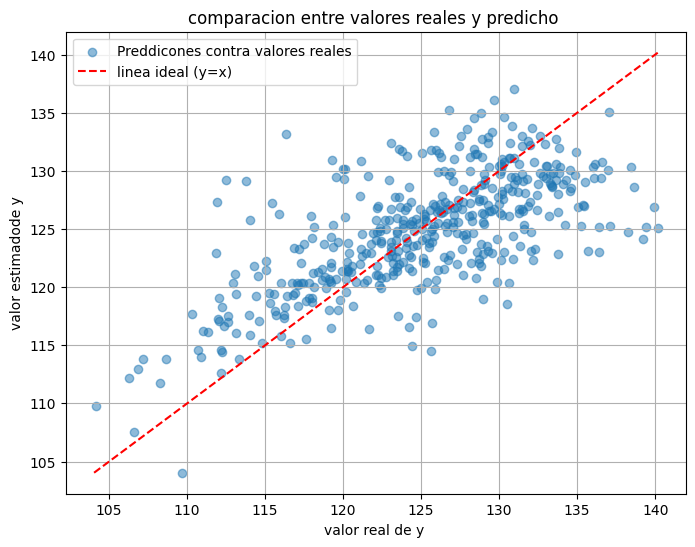

In [39]:
import matplotlib.pyplot as plt 
#crear grafica 

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_test, alpha = 0.5, label = "Preddicones contra valores reales")

min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
plt.plot([min_val,max_val],[min_val,max_val], color = "red", linestyle="--", label="linea ideal (y=x)")

plt.xlabel("valor real de y ")
plt.ylabel("valor estimadode y")
plt.title("comparacion entre valores reales y predicho ")
plt.legend()
plt.grid(True)
plt.show
